
# Project Question
The problem we are working on is predicting housing prices based on some parameters, and the train data that we must use to train our model.Then we need to test the test data with our model and try to predict the prices . The lesser the MSE the better the model.I break this project into different parts and explain each one sepertly.



---
# import

First I installed and imported the packages that I'll be needing through out the project



In [ ]:
install.packages('cattonum')
install.packages('randomForest')
install.packages('Metrics')
install.packages('neuralnet')
install.packages('rpart')
install.packages('caret')
library(caret)
library(readr)
library(stats)
require(ggplot2)
library(cattonum)
library(randomForest)
library(Metrics)
library(neuralnet)
library(rpart)


---
#Data

Now I read the data from the files given to us as train and test



In [20]:
train_data <- read_csv("train.csv")
test <- read_csv("test1.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  MSSubClass = col_double(),
  MSZoning = col_character(),
  LotArea = col_double(),
  SaleCondition = col_character(),
  SalePrice = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  MSSubClass = col_double(),
  MSZoning = col_character(),
  LotArea = col_double(),
  SaleCondition = col_character(),
  SalePrice = col_double()
)




---
# PreProcessing
For creating our model and training it we have some obsticales to remove before analysing our data. And also making some changes in order to create better train data to train our model.


***NA values***

 One of these obsticales is that  we have to make sure that there aren't any Na or missing values. We can easily figure this out by using is.na() function:


In [ ]:
sum(is.na(train_data))

[1] 0

As we can see there aren't any missing data.

***Encoding***


 As we saw in the data we have 2 categorical values : SalesCondition and MSZoning.The second obsticle is that we have to encode the categorical values into numeric for training. This can be done with different libraries and functions we will mention a few of them:


* ***factor encoding***

    Factor encoding is not a great way of encoding, it will replace each categorical parameter with a number starting from zero or a vector of numbers given to it by command .This encoding will not generate good models with high accuracy but it is one of the easiest encoding ways and it was my first try.

In [38]:
train_data$SaleCondition <- as.integer(as.factor(train_data$SaleCondition))
train_data$MSZoning <- as.integer(as.factor(train_data$MSZoning))
head(train_data)

Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,60,4,8450,5,208500
2,20,4,9600,5,181500
3,60,4,11250,5,223500
4,70,4,9550,1,140000
5,60,4,14260,5,250000
6,50,4,14115,5,143000



*   **One Hot encoding**

    We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.These newly created binary features are known as Dummy variables. The number of dummy variables depends on the levels present in the categorical variable.One of the problems of this type of encoding is the creation of new features and in some models like poly regression we need to assign a degree to features and the max degree is the number of diffrent values for each parameter, so we can't go that high.


* ***dummy encoding***

    Dummy coding scheme is similar to one-hot encoding. This categorical data encoding method transforms the categorical variable into a set of binary variables (also known as dummy variables). In the case of one-hot encoding, for N categories in a variable, it uses N binary variables. The dummy encoding is a small improvement over one-hot-encoding. Dummy encoding uses N-1 features to represent N labels/categories.

Since they are extremly similiar we will generate one code box for them



In [41]:
dmy <- dummyVars(" ~ .", data = train_data, fullRank = T)
train_data <- data.frame(predict(dmy, newdata = train_data))
head(train_data)

,Id,MSSubClass,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,LotArea,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,SalePrice
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,60,0,0,1,0,8450,0,0,0,1,0,208500
2,2,20,0,0,1,0,9600,0,0,0,1,0,181500
3,3,60,0,0,1,0,11250,0,0,0,1,0,223500
4,4,70,0,0,1,0,9550,0,0,0,0,0,140000
5,5,60,0,0,1,0,14260,0,0,0,1,0,250000
6,6,50,0,0,1,0,14115,0,0,0,1,0,143000


* Drawbacks of  One-Hot and Dummy Encoding

    One hot encoder and dummy encoder are two powerful and effective encoding schemes. They are also very popular among the data scientists, But may not be as effective when-

    1. A large number of levels are present in data. If there are multiple categories in a feature variable in such a case we need a similar number of dummy variables to encode the data. For example, a column with 30 different values will require 30 new variables for coding.
    2. If we have multiple categorical features in the dataset similar situation will occur and again we will end to have several binary features each representing the categorical feature and their multiple categories e.g a dataset having 10 or more categorical columns.

In both the above cases, these two encoding schemes introduce sparsity in the dataset i.e several columns having 0s and a few of them having 1s

Also, they might lead to a Dummy variable trap. It is a phenomenon where features are highly correlated. That means using the other variables, we can easily predict the value of a variable.

Due to the massive increase in the dataset, coding slows down the learning of the model along with deteriorating the overall performance that ultimately makes the model computationally expensive. Further, while using tree-based models these encodings are not an optimum choice.

* ***frequency encoding***

    The last encoding and the one i finally used in the project is frequency encoding. In this encoding we will give each categorical parameter of a feature the numeric number for it's frequency.Beacuse of our data this type of encoding worked the best.Therefore we will do this for our test data too.

In [21]:
cato_ans <- catto_freq(train=train_data,test=test, verbose = TRUE)
train_data = cato_ans$train
test = cato_ans$test
head(train_data)
head(test)


Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,60,1151,8450,1198,208500
2,20,1151,9600,1198,181500
3,60,1151,11250,1198,223500
4,70,1151,9550,101,140000
5,60,1151,14260,1198,250000
6,50,1151,14115,1198,143000


Id,MSSubClass,MSZoning,LotArea,SaleCondition,SalePrice
<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
16,45,218,6120,1198,132000
23,20,1151,9742,1198,230000
25,20,1151,8246,1198,154000
30,30,218,6324,1198,68500
35,120,1151,7313,1198,277500
36,60,1151,13418,1198,309000


---
#Exploratory Data Analysis(EDA)


***Features***

In this data we have 4 parameters which are:
*   **ID** 
*   **MSSubClass**: The building class 
*   **MSZoning**: The general zoning classification
*   **LotArea**: Lot size in square feet 
*   **SaleCondition**: Condition of sale
*   **Sale Price**: Dependent Variable

We examine each value seperetly:
* ***MSSubClass***:

    As we saw in the summary of our data , this value is numerical , which means we don't have to go through the trouble of encoding our data but we will process it furthermore.
    First we use the summary library to get the statistical basic data for the parameter and also ggplot library to see the plot of the value 
    

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   20.0    20.0    50.0    56.9    70.0   190.0 

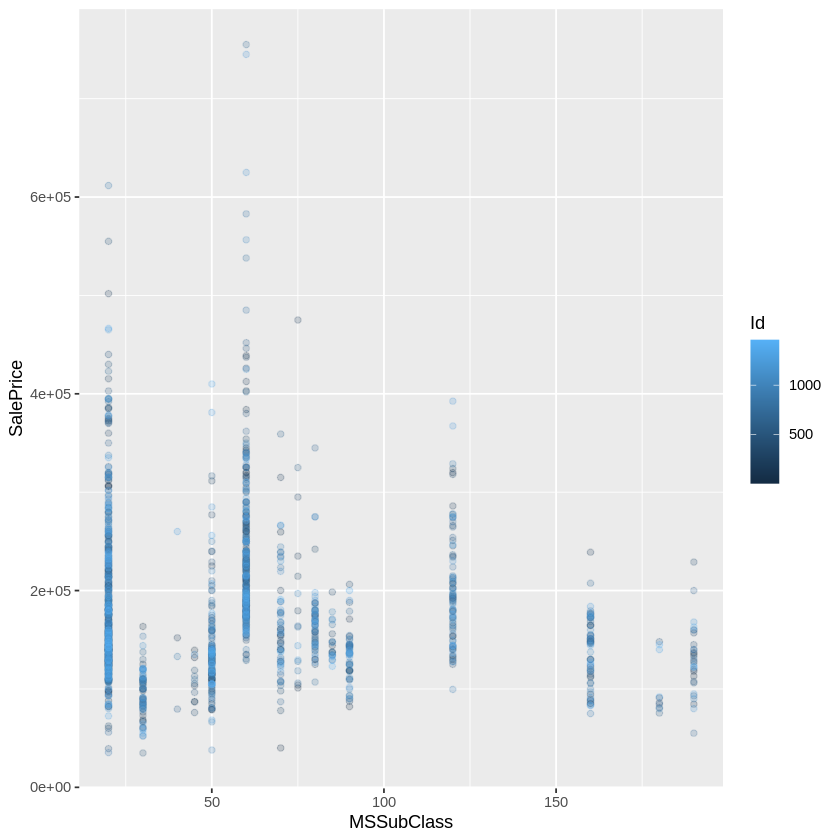

In [ ]:
summary(train_data$MSSubClass)
ggplot(data=train_data, mapping = aes(x = MSSubClass, y = SalePrice))+
  geom_point(alpha=0.2, aes(color = Id))

Based on the above plot we can see that the final SalesPrice does not change severly as the parameter decreases or increases.But we can test our assumption with the cor function, if the number is close to zero then we are correct.

In [ ]:
cor(train_data$MSSubClass, train_data$SalePrice)

[1] -0.08428414

as you can see we are, in fact correct :)))

now we repeat the above procedure for other features


*   ***LotArea***

    we run the the previous commands for this too in order to extract the statistical basic data and also find the relation between this feature and SalesPrice.



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1300    7554    9478   10517   11602  215245 

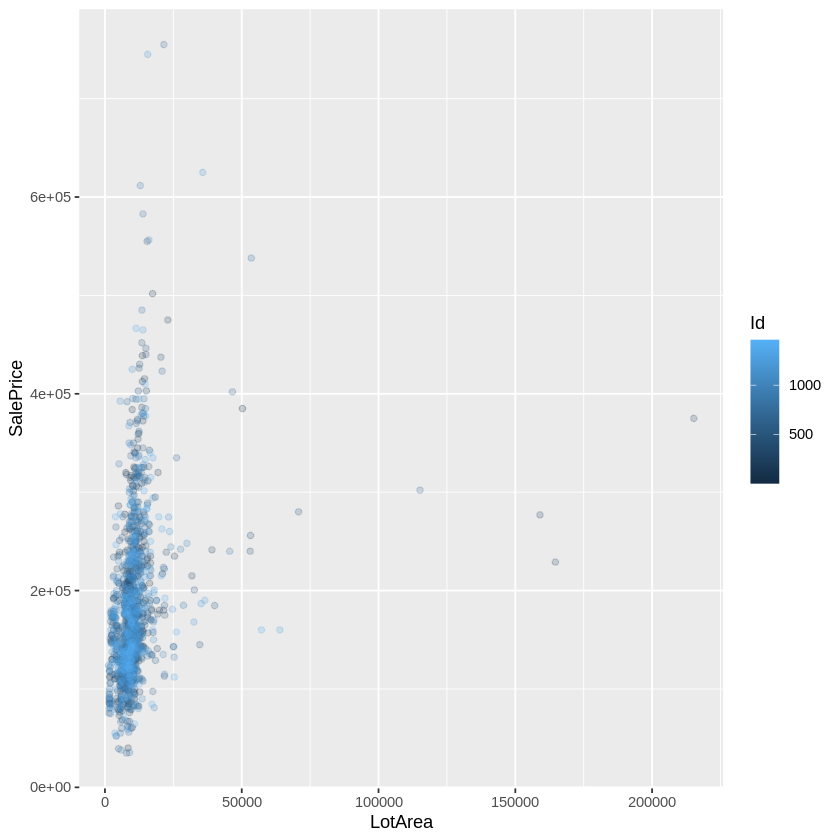

In [45]:
summary(train_data$LotArea)
ggplot(data=train_data, mapping = aes(x = LotArea, y = SalePrice))+
  geom_point(alpha=0.2, aes(color = Id))

based on the plot above we can consider datas with LotArea greater than 750 000 as outliners and remove them from our model. We can also see that the LotArea feature has more effect on SalesPrice than MSSubclass . again we will test our theory with cor() function.

In [47]:
train_data <-train_data[train_data$LotArea < 200000, ]
cor(train_data$LotArea, train_data$SalePrice)

[1] 0.2726182

* ***MSZoning***

    We repeat the process


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   10.0  1151.0  1151.0   942.9  1151.0  1151.0 

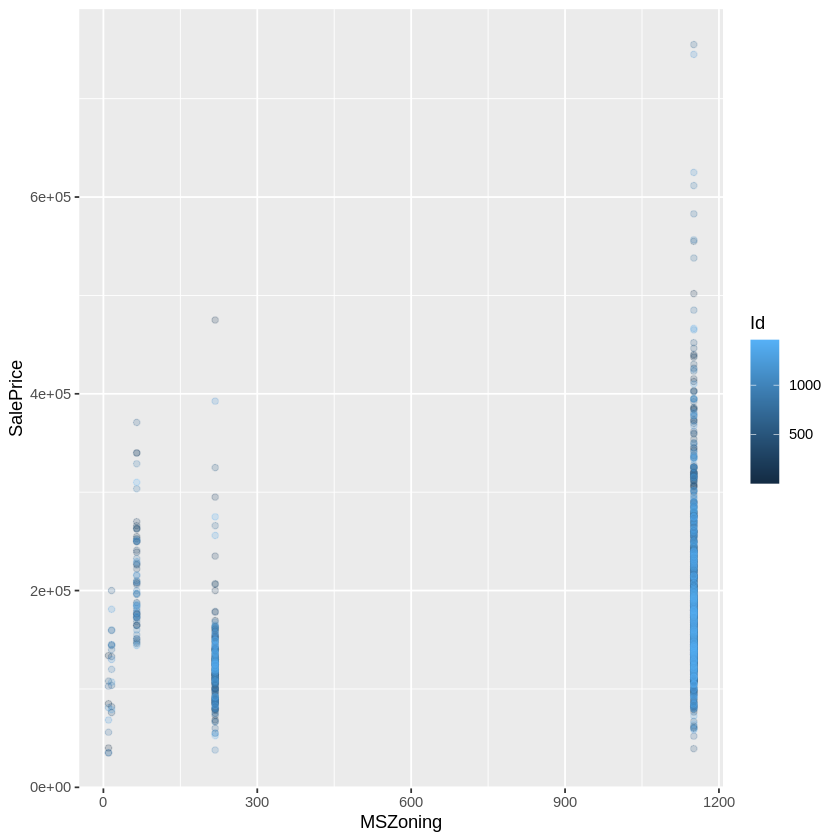

In [48]:
summary(train_data$MSZoning)
ggplot(data=train_data, mapping = aes(x = MSZoning, y = SalePrice))+
  geom_point(alpha=0.2, aes(color = Id))

Since this feature was encoded based on frequancy, we can clearly see that the parameter with higher frequancy has higher SalePrice therefore there is a fairly good relation between this feature and SalePrice.

In [49]:
cor(train_data$MSZoning, train_data$SalePrice)

[1] 0.2325747

* ***SaleCondition***
    lastly we will perform our procedure for SaleCondition
    

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      4    1198    1198    1001    1198    1198 

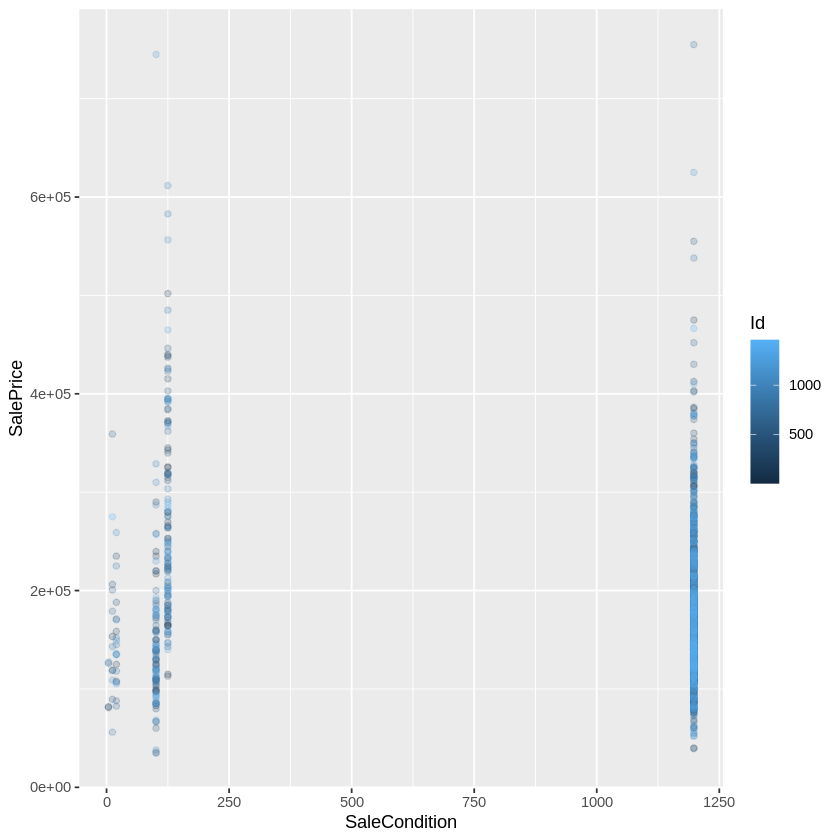

In [50]:
summary(train_data$SaleCondition)
ggplot(data=train_data, mapping = aes(x = SaleCondition, y = SalePrice))+
  geom_point(alpha=0.2, aes(color = Id))

What we can understand by comparing this plot with the other 3 plots is that this feature has more effect that MSSubclass but less effect than the other two features.we will test this theory with cor() command:

In [51]:
cor(train_data$SaleCondition, train_data$SalePrice)

[1] -0.1473894

---
# Model
Finally we will train our model . In this project i have worked with Linear Regression, Lasso Regression,Logistic Regression, Polynomial regression, neuralnet, Random Forest and finally Decision Tree.
In this section i will explain some of the important ones and the parameters i used to tune the model and also my finall mode.For each model we will get the finall prediction and the accuracy based on square of MSE, here we go :



*   ***Linear Regression***

    Linear regression is perhaps one of the most well known and well understood algorithms in statistics and machine learning.The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric.And as we can see below it doesn't have a good accuracy.


In [22]:
model <- lm(SalePrice~., data=train_data)
summary(model)



Call:
lm(formula = SalePrice ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-238161  -46970  -13158   29943  551569 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.544e+05  8.576e+03  18.008  < 2e-16 ***
Id            -3.419e+00  4.618e+00  -0.740    0.459    
MSSubClass     3.929e+01  4.910e+01   0.800    0.424    
MSZoning       4.032e+01  5.221e+00   7.722 2.11e-14 ***
LotArea        1.798e+00  1.996e-01   9.009  < 2e-16 ***
SaleCondition -3.016e+01  4.626e+00  -6.520 9.67e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74260 on 1454 degrees of freedom
Multiple R-squared:  0.1293,	Adjusted R-squared:  0.1263 
F-statistic: 43.18 on 5 and 1454 DF,  p-value: < 2.2e-16


In [23]:
p = predict(model, test)
sqrt(mse(test$SalePrice, p))

[1] 73595.24

* ***neural network Regression***

    Neural networks consist of simple input/output units called neurons (inspired by neurons of the human brain). These input/output units are interconnected and each connection has a weight associated with it. Neural networks are flexible and can be used for both classification and regression.Now I will explain some of the arguments that I used:

      1. hidden : a vector of integers specifying the number of hidden neurons (vertices) in each layer.
      2. threshold : a numeric value specifying the threshold for the partial derivatives of the error function as stopping criteria.
      3. stepmax : the maximum steps for the training of the neural network. Reaching this maximum leads to a stop of the neural network's training process.

    Unfortunately neural network is extremly complecated and in project I didn't have the needed time to learn how to best tune it, therefore the result was not pleasurable.


    


In [29]:
nn <- neuralnet(SalePrice~.,hidden = 10,threshold = 0.01 ,data=train_data, stepmax=1e7)
summary(nn)

                    Length Class      Mode    
call                   6   -none-     call    
response            1460   -none-     numeric 
covariate           7300   -none-     numeric 
model.list             2   -none-     list    
err.fct                1   -none-     function
act.fct                1   -none-     function
linear.output          1   -none-     logical 
data                   6   data.frame list    
exclude                0   -none-     NULL    
net.result             1   -none-     list    
weights                1   -none-     list    
generalized.weights    1   -none-     list    
startweights           1   -none-     list    
result.matrix         74   -none-     numeric 

In [30]:
p <- compute(nn, test)
sqrt(mse(test$SalePrice, p$net.result))

[1] 79379.92

* ***Random Forest***

    randomForest implements Breiman's random forest algorithm (based on Breiman and Cutler's original Fortran code) for classification and regression. It can also be used in unsupervised mode for assessing proximities among data points.Here are some of the parameters I use:


        1. mtry: Number of variables randomly sampled as candidates at each split. Note that the default values are different for classification (sqrt(p) where p is number of variables in x) and regression (p/3)
        2. ntree: Number of trees to grow. This should not be set to too small a number, to ensure that every input row gets predicted at least a few times.



  We will use the tuneRF function to get the best mtry value based on our data

mtry = 2  OOB error = 278120797 
Searching left ...
Searching right ...
mtry = 3 	OOB error = 98216822 
0.6468555 0.01 
mtry = 4 	OOB error = 50919048 
0.4815649 0.01 
mtry = 6 	OOB error = 24253578 
0.5236836 0.01 


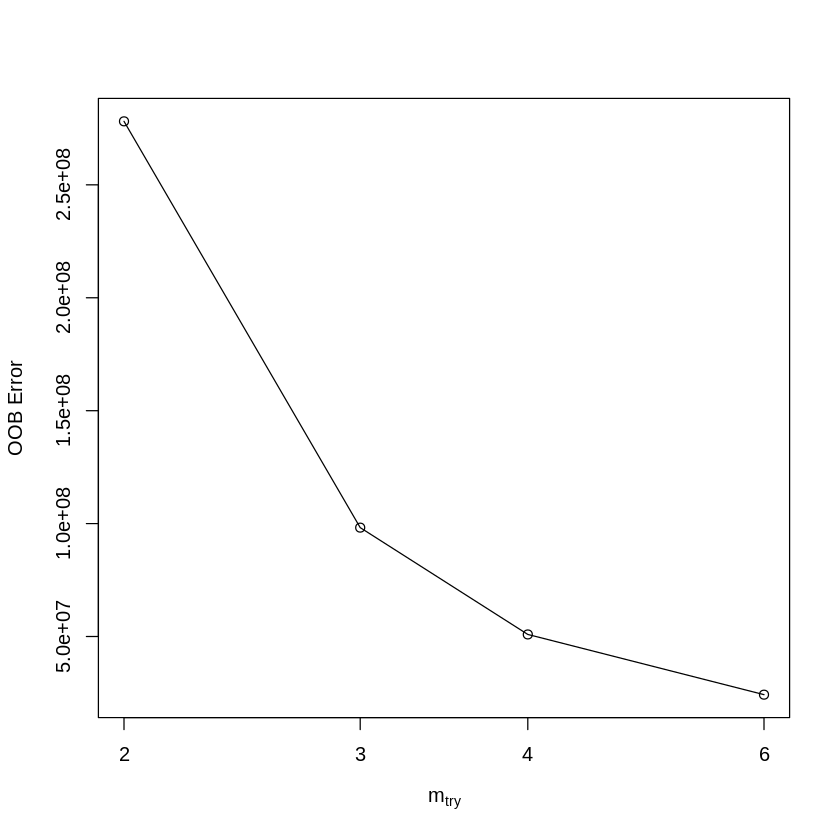

In [24]:
mtry <- tuneRF(train_data,train_data$SalePrice, ntreeTry=500,
               stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)
best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]

In [25]:
model <- randomForest(SalePrice ~., data=train_data, ntree=500, mtry=best.m)
summary(model)

Warning message in randomForest.default(m, y, ...):
“invalid mtry: reset to within valid range”


                Length Class  Mode     
call               5   -none- call     
type               1   -none- character
predicted       1460   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       1460   -none- numeric  
importance         5   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               1460   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

In [26]:
p = predict(model, test)
sqrt(mse(test$SalePrice, p))

[1] 26875.08

* ***Decision tree***

    Finally we will explain Decision Tree which is the model I used as my model for the finall accuracy.Decision tree is a graph to represent choices and their results in form of a tree. The nodes in the graph represent an event or choice and the edges of the graph represent the decision rules or conditions. It is mostly used in Machine Learning and Data Mining applications using R.Now the parameters:
        1. method: one of "anova", "poisson", "class" or "exp".It is wisest to specify the method directly, especially as more criteria may added to the function in future.
        2. control: a list of options that control details of the rpart algorithm.

      now the parameters in control:
        1.minsplit: the minimum number of observations that must exist in a node in order for a split to be attempted.
        2.cp: complexity parameter. Any split that does not decrease the overall lack of fit by a factor of cp is not attempted. 
        3. maxcompete: the number of competitor splits retained in the output. It is useful to know not just which split was chosen, but which variable came in second, third, etc.
        4. maxdepth: Set the maximum depth of any node of the final tree, with the root node counted as depth 0.



In [27]:
control = rpart.control(minsplit = 3, maxdepth = 30, cp=0, maxcompete = 10)
model <-rpart(SalePrice~., data=train_data, method = 'anova', control = control)
summary(model)


Call:
rpart(formula = SalePrice ~ ., data = train_data, method = "anova", 
    control = control)
  n= 1460 

              CP nsplit  rel error    xerror       xstd
1   1.728503e-01      0 1.00000000 1.0016082 0.07652093
2   3.016483e-02      1 0.82714974 0.8394196 0.06154609
3   2.785722e-02      3 0.76682009 0.8094447 0.06165082
4   2.158457e-02      4 0.73896288 0.7934148 0.06331233
5   1.589929e-02      6 0.69579373 0.7584970 0.06280349
6   1.560190e-02      7 0.67989444 0.7469869 0.06273107
7   1.205828e-02      8 0.66429254 0.7295786 0.06236354
8   1.110797e-02      9 0.65223426 0.8018112 0.07605653
9   1.104468e-02     10 0.64112629 0.8039987 0.07673271
10  1.084977e-02     14 0.59574870 0.8039987 0.07673271
11  9.319446e-03     15 0.58489893 0.8765823 0.09329486
12  9.038862e-03     19 0.54762114 0.8752799 0.09327554
13  8.727171e-03     21 0.52954342 0.8683962 0.09322219
14  6.750978e-03     23 0.51208908 0.8268701 0.09174492
15  5.871946e-03     24 0.50533810 0.8225270 0.092

In [28]:
p = predict(model, test)
sqrt(mse(test$SalePrice, p))


[1] 11695.44

---
# Conclusion

To give a short summary of the finall result, after importing our libraries and reading the train and test data, I turned the categorical values into numerical using frequency encoding.Since we didn't have any Na value, no action was needed regarding Na parameters. Then we analysed the value with their plor and cor function to realize how they effected our SalePrice. After that we used the Decision Tree to train our model for this problem and finally I predicted the test data and got the accuracy based on square of MSE with was almost 11700.


# Refrences


*   https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
*   https://www.rdocumentation.org/packages/randomForest/versions/4.6-14/topics/randomForest
*   https://www.guru99.com/r-decision-trees.html
*   https://www.geeksforgeeks.org/how-neural-networks-are-used-for-regression-in-r-programming/

    **...**



